# Banknote dimensions

Which banknotes exhibit the greatest size differences between denominations? Which are the largest overall?

Banknote dimensions differ widely across countries.

The size of a banknote impacts its practicality. Uniform dimensions enhance durability by ensuring a snug wallet fit, while also enabling vending machines and ATMs to process them seamlessly. Conversely, varied sizes assist the visually impaired in distinguishing denominations, though smaller notes can pose challenges for machine sorting and counting.

Striking a balance between these considerations is essential in currency design.

The file `banknote-dimensions.csv` shows the `length` and `width` in millimeters for 42 currencies. This dataset spans all 22 subregions and sub-subregions of the world, as defined by the United Nations Statistics Division's geoscheme.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'banknote-dimensions.csv'.

# from google.colab import files
# uploaded = files.upload()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('banknote-dimensions.csv')
df

,currency,code,value,length,width
0,Argentine Peso,ARS,2,155.0,65.0
1,Argentine Peso,ARS,5,155.0,65.0
2,Argentine Peso,ARS,10,155.0,65.0
3,Argentine Peso,ARS,20,155.0,65.0
4,Argentine Peso,ARS,50,155.0,65.0
...,...,...,...,...,...
245,West African Franc,XOF,500,114.0,60.0
246,West African Franc,XOF,1000,125.0,66.0
247,West African Franc,XOF,2000,130.0,65.0
248,West African Franc,XOF,5000,140.0,74.0


In [2]:
# longest and shortest banknotes for each currency
# modify the code below if you are more interested in width
length = df.groupby('currency').agg(max=('length', 'max'), min=('length', 'min')).reset_index()
length['diff'] = length['max'] - length['min']
length.head()

,currency,max,min,diff
0,Argentine Peso,155.0,155.0,0.0
1,Australian Dollar,158.0,130.0,28.0
2,Bangladeshi Taka,155.0,100.0,55.0
3,Bolivian Boliviano,140.0,140.0,0.0
4,Canadian Dollar,152.4,152.4,0.0


In [3]:
# helper function, change gap, vertical alignment, horizontal alignment, placement of gap...
def add_labels(df, x_col, y_col, label_col):
	for i, row in df.iterrows():
		x = row[x_col]
		y = row[y_col]
		gap = "  "
		label = gap + row[label_col]
		plt.text(x, y, label, va='center', ha='left')

### Project Ideas

- Generate paired scatter plots to compare the `length` of the longest and shortest banknotes for each currency.

- Create similar paired scatter plots, but for `width` instead of `length`.

- Incorporate the Pro Tips into your visualizations.

- Add labels to data points to highlight key insights or narrate a compelling story.

- Calculate the percentage of currencies where:
	- Only the `length` remains consistent across all denominations.
	- Only the `width` remains consistent across all denominations.
	- Both `length` and `width` vary with denominations.
	- All denominations share identical `length` and `width` dimensions.

- Visualize these findings in a clear, engaging format.

Below is a preliminary paired scatter plot of banknote length to serve as a starting point.

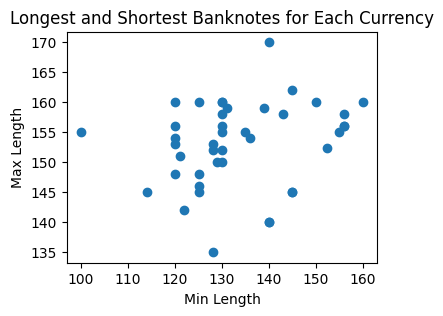

In [5]:
plt.figure(figsize=(4, 3))  
plt.scatter(length['min'], length['max'])
plt.xlabel('Min Length')
plt.ylabel('Max Length')
plt.title('Longest and Shortest Banknotes for Each Currency')
plt.show()

In [12]:
#Helper functions
def add_equality_line(df):
    vmin = min(df['min'].min(), df['max'].min())
    vmax = max(df['min'].max(), df['max'].max())
    plt.plot([vmin, vmax], [vmin, vmax], color='black', alpha=0.5, linestyle='--')

def square_the_plot(df, pad=0.0):
    vmin = min(df['min'].min(), df['max'].min())
    vmax = max(df['min'].max(), df['max'].max())
    span = vmax - vmin
    plt.xlim(vmin - pad*span, vmax + pad*span)
    plt.ylim(vmin - pad*span, vmax + pad*span)
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

  

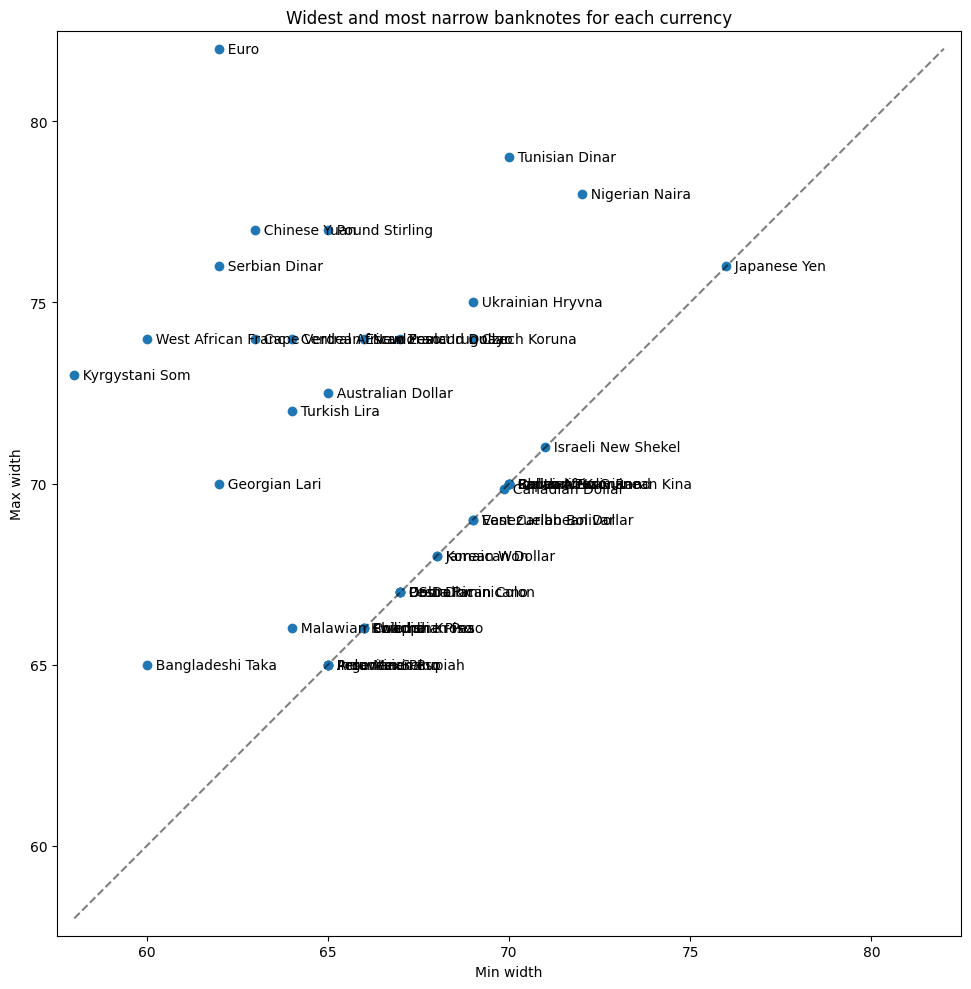

In [17]:
# Create similar paired scatter plots, but for `width` instead of `length`.
width = df.groupby('currency').agg(max=('width', 'max'), min=('width', 'min')).reset_index()
width['diff'] = width['max'] - width['min']

plt.figure(figsize=(10,10))
plt.scatter(width['min'],width['max'])
plt.xlabel('Min width')
plt.ylabel('Max width')
plt.title('Widest and most narrow banknotes for each currency')
add_equality_line(width)
square_the_plot(width,pad=0.02)
add_labels(width, 'min', 'max', 'currency')

plt.tight_layout()
plt.show()

Percentage where only length is consistent: 0.0%
Percentage where only width is consistent: 33.3%
Percentage where both length and width vary: 45.2%
Percentage where both length and width are consistent: 21.4%


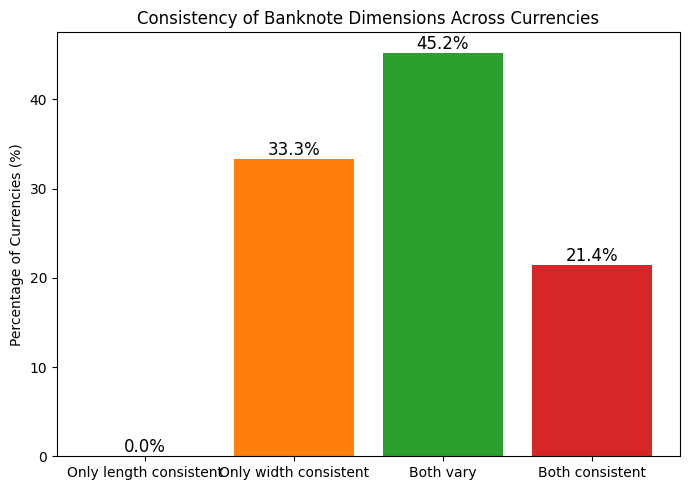

In [20]:
'''
Calculate the percentage of currencies where:
	- Only the `length` remains consistent across all denominations.
	- Only the `width` remains consistent across all denominations.
	- Both `length` and `width` vary with denominations.
	- All denominations share identical `length` and `width` dimensions.
'''

# Use the 'length' and 'width' DataFrames already computed
total_currencies = len(length)

only_length_consistent = ((length['diff'] == 0) & (width['diff'] != 0)).sum()
only_width_consistent = ((width['diff'] == 0) & (length['diff'] != 0)).sum()
both_vary = ((length['diff'] != 0) & (width['diff'] != 0)).sum()
both_consistent = ((length['diff'] == 0) & (width['diff'] == 0)).sum()

print("Percentage where only length is consistent: {:.1f}%".format(100 * only_length_consistent / total_currencies))
print("Percentage where only width is consistent: {:.1f}%".format(100 * only_width_consistent / total_currencies))
print("Percentage where both length and width vary: {:.1f}%".format(100 * both_vary / total_currencies))
print("Percentage where both length and width are consistent: {:.1f}%".format(100 * both_consistent / total_currencies))


# Visualize these findings in a clear, engaging format.

labels = [
	"Only length consistent",
	"Only width consistent",
	"Both vary",
	"Both consistent"
]
values = [
	only_length_consistent,
	only_width_consistent,
	both_vary,
	both_consistent
]
percentages = [100 * v / total_currencies for v in values]

plt.figure(figsize=(7,5))
bars = plt.bar(labels, percentages, color=['C0','C1', 'C2', 'C3'])
plt.ylabel('Percentage of Currencies (%)')
plt.title('Consistency of Banknote Dimensions Across Currencies')

for bar, pct in zip(bars, percentages):
	plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{pct:.1f}%", ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()
